# 函数

　　有了语句我们可以做很多事，但是如果要编写大型或更复杂的程序，那么代码的重用性值得我们考虑，因此就有了函数，函数其实可以重复利用的代码块。回忆一下我们N年前用C++痛苦的编写一个斐波那契数列，现用python是多么容易的实现：

In [4]:
fibs=[0,1]
num=int(input('how much do you want:'))##注意这里是input,或者是int(raw_input("")),不然会出错

how much do you want:45


In [5]:
for i in range(num-2):
    fibs.append(fibs[-2]+fibs[-1]) #斐波那契数列

In [7]:
print(fibs) #直接fibs是竖直长列

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733]


In [9]:
fibs[-1]#倒数第一个； [-2]倒数第二个

701408733

函数可以调用，它执行某种操作并且可能返回值，内建的callable函数（python3中无此函数）可以判断函数是否可以调用：
明明有这个函数的

In [10]:
import math

In [11]:
x=1
y=math.sqrt
callable(x)

False

In [12]:
callable(y)

True

## 创建函数——用def关键字来定义

In [32]:
#创建函数
def fibs(num):
    result=[0,1]   #初始值
    for i in range(num-2):
        result.append(result[-2]+result[-1]) #后续生成
    return result #return不对其   结果就不一样  TMD

In [33]:
#调用函数
fibs(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

In [34]:
fibs(15)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

## 记录函数

　　要想给函数写文档让函数容易理解的话，除了写注释外还可以写文档字符串，它作为函数的一部分进行存储，并且可以调用查看：

In [2]:
def square(x):
    'calculate the square of the nunmber x.' #插入文档字符串
    return x*x

In [3]:
square.__doc__  ## 2个下划线
#__doc是函数属性，输入square.，然后按tab键，能看到所有的函数属性）
#The function attributes named func_X have been renamed to use the __X__ form, 
#freeing up these names in the function attribute namespace for user-defined attributes. 
#To wit, func_closure, func_code, func_defaults, func_dict, func_doc, func_globals, func_name were renamed 
#to __closure__, __code__, __defaults__, __dict__, __doc__, __globals__, __name__, respectively.

'calculate the square of the nunmber x.'

## 函数参数

函数的定义和调用都比较简单，但是函数的用法是体现在它的参数上的，这个比较复杂。

（1）、普通形参

In [11]:
def printmax(a,b):  # don't forget :::::::: 

    if a>b:
        print (a, 'is maximum')
    else:  # ：：：：对其if
        print (b, 'is maximum')

In [13]:
printmax(5,3)

5 is maximum


（2）、默认参数值

In [14]:
def say(message, times=2):
    print (message*times)

In [15]:
say('hello')

hellohello


In [16]:
say(5)

10


(3）、关键参数

In [17]:
def func(a, b=5, c=10):
    print ('a is', a, 'and b is', b,' and c is', c)
    

In [18]:
func(4)

a is 4 and b is 5  and c is 10


（4）、可变长度参数

　　1）、*非关键字可变长参数(元组)

In [22]:
def tupleVarArgs(arg1, arg2='defaultB', *theRest):  ### *允许更多元素； 在变量前加*，则多余的函数参数会作为一个元组存在args中，
    print('arg 1:', arg1)
    print('arg 2:', arg2)
    for eachXtrArg in theRest:
        print ('another arg:', eachXtrArg)

In [23]:
tupleVarArgs('abc')

arg 1: abc
arg 2: defaultB


In [24]:
tupleVarArgs(45, 67.8)

arg 1: 45
arg 2: 67.8


In [26]:
tupleVarArgs('abc',123,'xyz',456.7)

arg 1: abc
arg 2: 123
another arg: xyz
another arg: 456.7


2）、**关键字变量参数(字典)

In [39]:
def dictVarArgs(arg1, arg2='defaultB', **theRest):  ### python在参数名之前使用2个星号来支持任意多的关键字参数。

    print('arg 1:', arg1)
    print('arg 2:', arg2)
    for eachXtrArg in theRest.keys():
        print ('Xtra arg {}: {}' .format(eachXtrArg, str(theRest[eachXtrArg])) )

In [40]:
dictVarArgs(1220,740.0, c='gmail')

arg 1: 1220
arg 2: 740.0
Xtra arg c: gmail


In [41]:
dictVarArgs('one', d=10, e='zoo', girls=('Jenny', 'Penny'))

arg 1: one
arg 2: defaultB
Xtra arg d: 10
Xtra arg e: zoo
Xtra arg girls: ('Jenny', 'Penny')


In [43]:
dictVarArgs(arg2='tales', c=123,d='zoo', arg1='my')

arg 1: my
arg 2: tales
Xtra arg c: 123
Xtra arg d: zoo


3）、组合使用

In [58]:
def newfoo(arg1, arg2,*t, **d):
    print ('arg 1 is:', arg1)
    print ('arg 2 is:', arg2)

    for eacht in t:
        print ('add non-keyword:', eacht)
    for eachd in d.keys():
        print('add keyword {}: {}'.format(eachd, d[eachd]))

In [49]:
#  def newfoo(arg1, arg2, *t, **d):
#     print ('arg1 is :', arg1)
#     print ('arg2 is :', arg2)
#     for eacht in t:
#         print ('add non-keyword:', eacht)
#     for eachd in d.keys():
#         print ("add keyword '%s': %s" %(eachd, d[eachd]))

In [59]:
newfoo(10, 20, 30, 40, foo=50, bar=60)

arg 1 is: 10
arg 2 is: 20
add non-keyword: 30
add non-keyword: 40
add keyword foo: 50
add keyword bar: 60


In [61]:
atuple=(7,8,9)
adict={'jzhou':22}
newfoo(1,2,3,x=4,y=5,z=6,*atuple, **adict)   ### 函数里的元胞（可变长的参数）和字典

arg 1 is: 1
arg 2 is: 2
add non-keyword: 3
add non-keyword: 7
add non-keyword: 8
add non-keyword: 9
add keyword x: 4
add keyword y: 5
add keyword z: 6
add keyword jzhou: 22


## 变量

（1）、变量作用域

python能够改变变量作用域的代码段是def、class、lamda

In [62]:
def scopetest():
    localvar=6
    print(localvar)

In [63]:
scopetest()

6


In [64]:
scopetest(localvar) #在函数外不能访问lcoalvar

NameError: name 'localvar' is not defined

if/elif/else、try/except/finally、for/while 并不能涉及变量作用域的更改，也就是说他们的代码块中的变量，在外部也是可以访问的

In [67]:
if True:
    a=3
    print (a)
else : print('not equals to 3')

3


In [69]:
a #外部也可以访问

3


（2）、局部变量和全局变量

In [70]:
# 局部变量
def func(x):
    print ('x is', x)
    x=2
    print ('Changed local x to', x)

In [72]:
x=50

In [73]:
func(x)

x is 50
Changed local x to 2


In [74]:
x  ## def里面的不能外部使用，外部x依然没变

50

In [91]:
# 全局变量
def func(self): #Your func method needs 'self' as a parameter, since it is a class method and not a function. Adding that should make it work fine.
    global x #定义全局变量 x
    print ('x is', x)
    x=2
    print ('Changed local x to', x)

In [92]:
x=50
x

50

In [93]:
func(x)

x is 50
Changed local x to 2


In [94]:
x

2

## lambda匿名函数

　　使用方法：lambda [arg1[,arg2,arg3,...,argn]] : expression
   除了def语句之外，Python还提供了一种生成函数对象的表达式形式。由于它与LISP语言中的一个工具很相似，所以称为lambda。就像def一样，这个表达式创建了一个之后能够调用的函数，但是它返回了一个函数而不是将这个函数赋值给一个变量名。这也就是lambda有时叫做匿名函数的原因。实际上，他们常常以一种行内进行函数定义的形式使用，或者用作推迟执行一些代码。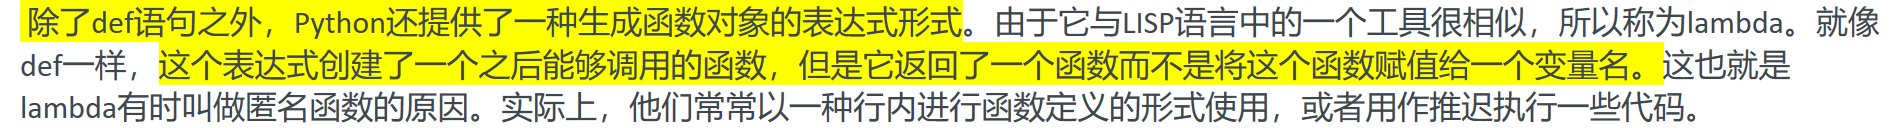

In [95]:
Factorial=lambda x: x>1 and x*Factorial(x-1) or 1  ##  x>1时求x的阶乘，其它返回1

In [96]:
print(Factorial(6))

720


In [97]:
max = lambda a,b: (a>b) and a or b ## a>b时返回a,否则返回b

In [98]:
print(max(2,4))

4


In [122]:
x, y=11,12
x
y

12

In [123]:
x

11

In [129]:
 print ( ( lambda: x+y )() ) #使用默认的x,y, 注意括号的数量

23


In [130]:
print ( (lambda x: x+y)(x)  )#传的参数是x,y使用默认的12

23


In [131]:
 print ( (lambda x:  x+y)(y)  )#传的参数是y,则y替换x, lambda后面是使用的传递过来的值， 最后的（）里面代表谁传递过来的
    #  x=y=12, x(12)+y(12 by default)

24


In [109]:
>>> def func(x, y, z): return x + y + z
>>> func(2, 3, 4)

9

In [110]:
>>> f = lambda x, y, z: x + y +z  #但是，能够使用lambda表达式达到相同的效果，通过明确地将结果赋值给一个变量名，之后就能够通过这个变量名调用这个函数
>>> f(2, 3, 4) #这里的f被赋值给一个lambda表达式创建的函数对象。 这也就是def所完成的任务，只不过def的赋值是自动进行的

9

In [106]:
>>> x = (lambda a="fee", b="fie", c="foe": a + b + c) #默认参数也能够在lambda参数中使用，就像在def中使用一样。
>>> x("wee")

'weefiefoe'

In [118]:
#在lambda主体中的代码想在def内的代码一样都遵循相同的作用于查找法则。
#lambda表达式引入的一个本地作用域更像一个嵌套的def语句，将会自动从上层函数中、模块中 以及内置作用域中（通过LEGB法则）查找变量名。
def knights():
    title = "Sir"
    action = (lambda x: title + ' ' + x)
    return action

In [119]:
act = knights()

In [120]:
act('robin')

'Sir robin'

## Generator生成器

　　可以保存状态的函数，用yield指令(不是return)返回一个值，并保存当前整个函数执行状态，等待下一次调用，如此循环往复，直至函数末尾，发生StopIteration异常。generator利用next()来获取下一个返回值

In [141]:
def gen(n):
    for i in range(n):
        yield i

In [142]:
g=gen(5)

In [145]:
g.__next__() 
##Correct, g.next() has been renamed to g.__next__(). The reason for this is consistency: Special methods like __init__() and __del__ all have double underscores (or "dunder" in the current vernacular), and .next() was one of the few exceptions to that rule. This was fixed in Python 3.0. [*]
## But instead of calling g.__next__(), as Paolo says, use next(g).

0

In [146]:
next(g)

1

In [148]:
for x in g:
    print (x)

2
3
4


In [149]:
print(next(g)) # #迭代已停止 

StopIteration: 

In [150]:
L = [0,1,2,3]

In [151]:
L_prime = range(4)

In [155]:
[x for x in range(4)]

[0, 1, 2, 3]

In [ ]:
## 测试强行停止程序  需要restart the kernal
# i = 0
# while i==0:
#     a = 1

## Iterations迭代器 

　　iter and next函数

In [1]:
L=[1,2,3]

In [3]:
I=iter(L)  ##LIST   iterator
I

In [4]:
print(next(I))

1


In [5]:
print(next(I))

2


In [6]:
print(next(I))

3


In [7]:
print(next(I)) ##迭代停止

StopIteration: 

In [10]:
for x in I: print((x)) #已经迭代完了

In [35]:
Y=iter(L)  #L=[1,2,3]
Y

In [36]:
while True:  #再跑一次结果就不一样
    try:
        X=next(Y)
    except StopIteration:
        break
    print(X**2)

1
4
9


In [56]:
R=range(3) #R=[0,1,2]列表

In [57]:
I1,I2=iter(R), iter(R)
I1

In [47]:
print(next(I1), next(I1),next(I2))

0 1 0


In [51]:
print(next(I1), next(I1),next(I1),next(I2),next(I2)) #i1 i2各自循环下去

0 1 2 0 1


In [58]:
print(next(I1), next(I1),next(I1)) #i1 i2各自循环下去  4个不行，迭代停止

0 1 2


## 内建函数

（1）、enumerate函数 ——获得数组，或列表的索引及值

In [59]:
string='hello'

In [61]:
print(list(enumerate(string))) #索引和值都有了， list的

[(0, 'h'), (1, 'e'), (2, 'l'), (3, 'l'), (4, 'o')]


In [64]:
for ind,value in enumerate(string):
    print(ind, value)

0 h
1 e
2 l
3 l
4 o


（2）、filter函数

　　filter(bool_func,seq)：此函数的功能相当于过滤器。调用一个布尔函数bool_func来迭代遍历每个seq中的元素；返回一个使bool_seq返回值为true的元素的序列。

In [66]:
def f(x):
    return x %2!=0 and x%3!=0 #不能被2也不能被3整除的数  布尔

In [78]:
print( list(filter(f, range(2,25))) ) #filter(bool_func,seq)：

[5, 7, 11, 13, 17, 19, 23]


In [75]:
filter(f, range(2,25))  ## 为什么不显示？？？类型不对，需要变成list显示

3）、map函数

　　map(func,seq1[,seq2...])：将函数func作用于给定序列的每个元素，并用一个列表来提供返回值；如果func为None，func表现为身份函数，返回一个含有每个序列中元素集合的n个元组的列表。

In [1]:
def cube(x):
    return x*x*x

In [10]:
#print ( list(map(cube, range(1,5)) ) 
list(map(cube, range(1,5)))  ## no need to print

[1, 8, 27, 64]

In [11]:
list(filter(cube,range(1,5)))

[1, 2, 3, 4]

In [15]:
list(map(lambda x: x*2, [1,2,3,4,[5,6,7]] ) )## no need to print;  list*2=重复两次，而不是元素各自乘以2？？？
### iteration, 各自计算

[2, 4, 6, 8, [5, 6, 7, 5, 6, 7]]

In [16]:
[1,2,3,4,[5,6,7]]

[1, 2, 3, 4, [5, 6, 7]]

In [17]:
[1,2,3,4,[5,6,7]]*2

[1, 2, 3, 4, [5, 6, 7], 1, 2, 3, 4, [5, 6, 7]]

In [18]:
[1,2,3]*2

[1, 2, 3, 1, 2, 3]

None 参数：

In [31]:
map(None, 'abc','xyz123')

In [32]:
type(map(None, 'abc','xyz123'))

map

In [36]:
print(map(None,'abc','xyz123'))

In [37]:
list(print(map(None,'abc','xyz123')))

TypeError: 'NoneType' object is not iterable

## （4）、reduce函数 
　　reduce(func,seq[,init])：func 为二元函数，将func作用于seq序列的元素，每次携带一对（先前的结果以及下一个序列的元素），连续的将现有的结果和下一个值作用在获得的随后的结果上，最后减少我们的序列为一个单一的返回值：如果初始值init给定，第一个比较会是init和第一个序列元素而不是序列的头两个元素。
  
  
  python 3: Removed reduce(). Use functools.reduce() if you really need it; however, 99 percent of the time an explicit for loop is more readable.

In [39]:
print( functools.reduce((lambda x,y:x+y),[1,2,3,4]))

NameError: name 'functools' is not defined

## （5）、zip函数

　　zip允许用户使用for循环访问平行的多个序列,zip将一个或多个序列作为参数,然后返回一系列的与序列中项平行的元组。

In [41]:
x,y=[1,2,3],[4,5,6]

In [43]:
list(zip(x,y)) #not  print()

[(1, 4), (2, 5), (3, 6)]

In [46]:
print(list(zip(x,y)))

[(1, 4), (2, 5), (3, 6)]


In [47]:
print (dict(zip(x,y)))

{1: 4, 2: 5, 3: 6}


In [48]:
print (tuple(zip(x,y)))

((1, 4), (2, 5), (3, 6))


In [50]:
T1, T2, T3 = (1,2,3), (4,5,6), (7,8,9)
print (list(zip(T1, T2, T3)))

[(1, 4, 7), (2, 5, 8), (3, 6, 9)]


In [52]:
print (tuple(zip(T1, T2, T3)))

((1, 4, 7), (2, 5, 8), (3, 6, 9))


## （6）、type函数——得到对象的类型

In [53]:
>>> type(12)


int

In [55]:
type('hello')

str

In [56]:
type(type(42))

type

In [57]:
type([].append)

builtin_function_or_method

## （7）、cmp函数——比较两个对象是否相等

The cmp() function should be treated as gone, and the __cmp__() special method is no longer supported. Use __lt__() for sorting, __eq__() with __hash__(), and other rich comparisons as needed. (If you really need the cmp() functionality, you could use the expression (a > b) - (a < b) as the equivalent for cmp(a, b).)

## （8）、类型转换



In [59]:
float(4)

4.0

In [61]:
complex(1.4,8)#转化为复数

(1.4+8j)

In [64]:
# coerce(1j,123)#复数表示。Removed coerce(). This function no longer serves a purpose now that classic classes are gone.

In [65]:
ord('s') ##ASCII转换

115

In [66]:
chr(115)

's'

In [69]:
#进制转换
hex(255) #16进制

'0xff'

In [70]:
oct(255)#8进制

'0o377'